In [3]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [3]:
# open raw json file as json object and save as a list
path = "../data/marcmehrotra@gmail.com_0_summarizedActivities.json"

with open(path) as summarizedActivities_file:
    summarizedActivities_list = json.load(summarizedActivities_file)

In [4]:
# confirm json file has been sucessfully saved as a list data type
print(type(summarizedActivities_list))

# view length of list
print(len(summarizedActivities_list))

# check data type of list item
print(type(summarizedActivities_list[0]))

# make a dictionary of the 1 and only list item
summarizedActivities_listItem1_dict = dict(summarizedActivities_list[0])

# check length of dict
print(len(summarizedActivities_listItem1_dict))

<class 'list'>
1
<class 'dict'>
1


In [5]:
# problem printing values of summarizedActivities_listItem1_dict...
# for key, value in summarizedActivities_listItem1_dict:
#     print(key, value)

# try printing just the key
print(summarizedActivities_listItem1_dict.keys())

# getting the data type of the value
print(type(summarizedActivities_listItem1_dict.get('summarizedActivitiesExport')))

# saving the value of the dict as a list
summarizedActivities_subList1 = summarizedActivities_listItem1_dict.get('summarizedActivitiesExport')

# taking a look at the length of the list
print(len(summarizedActivities_subList1))

dict_keys(['summarizedActivitiesExport'])
<class 'list'>
1000


In [6]:
# taking a look at one of the list items
summarizedActivities_subList1[0]

{'activityId': 13719399059,
 'uuidMsb': 5607709462133360387,
 'uuidLsb': -8436957552403133081,
 'name': 'Chapel Hill Trail Running',
 'activityType': 'trail_running',
 'userProfileId': 88467128,
 'timeZoneId': 149,
 'beginTimestamp': 1706537501000,
 'eventTypeId': 9,
 'rule': 'private',
 'sportType': 'RUNNING',
 'startTimeGmt': 1706537501000.0,
 'startTimeLocal': 1706519501000.0,
 'duration': 1553485.9619140625,
 'distance': 470231.982421875,
 'elevationGain': 7694.999998807907,
 'elevationLoss': 7743.000000715256,
 'avgSpeed': 0.30269999504089357,
 'maxSpeed': 0.3704999923706055,
 'avgHr': 140.0,
 'maxHr': 153.0,
 'avgRunCadence': 78.0,
 'maxRunCadence': 83.0,
 'steps': 4058.0,
 'calories': 1307.28624,
 'bmrCalories': 146.6507,
 'startLongitude': -79.07014109194279,
 'startLatitude': 35.93096969649196,
 'aerobicTrainingEffect': 2.9000000953674316,
 'avgStrideLength': 115.52242747701614,
 'avgFractionalCadence': 0.609375,
 'maxFractionalCadence': 0.5,
 'vO2MaxValue': 54.0,
 'elapsedDur

In [7]:
# create dataframe from our list
summarizedActivities_df = pd.DataFrame(summarizedActivities_subList1)

print(summarizedActivities_df.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 101 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    activityId                      1000 non-null   int64  
 1    uuidMsb                         1000 non-null   int64  
 2    uuidLsb                         1000 non-null   int64  
 3    name                            1000 non-null   object 
 4    activityType                    1000 non-null   object 
 5    userProfileId                   1000 non-null   int64  
 6    timeZoneId                      1000 non-null   int64  
 7    beginTimestamp                  1000 non-null   int64  
 8    eventTypeId                     1000 non-null   int64  
 9    rule                            1000 non-null   object 
 10   sportType                       999 non-null    object 
 11   startTimeGmt                    1000 non-null   float64
 12   startTimeLocal     

In [8]:
# try same procedure on "marcmehrotra@gmail.com_1001_summarizedActivities.json"
# most likely a continuation of "marcmehrotra@gmail.com_0_summarizedActivities.json"

# open raw json file as json object and save as a list
path = "../data/marcmehrotra@gmail.com_1001_summarizedActivities.json"

with open(path) as summarizedActivities2_file:
    summarizedActivities2_list = json.load(summarizedActivities2_file)

In [9]:
# view length of list
print(len(summarizedActivities2_list))

# check data type of list item
print(type(summarizedActivities2_list[0]))

# make a dictionary of the 1 and only list item
summarizedActivities2_listItem1_dict = dict(summarizedActivities2_list[0])

# check length of dict
print(len(summarizedActivities2_listItem1_dict))

1
<class 'dict'>
1


In [10]:
# print key
print(summarizedActivities2_listItem1_dict.keys())

# getting the data type of the value
print(type(summarizedActivities2_listItem1_dict.get('summarizedActivitiesExport')))

# saving the value of the dict as a list
summarizedActivities2_subList1 = summarizedActivities2_listItem1_dict.get('summarizedActivitiesExport')

# taking a look at the length of the new list
print(len(summarizedActivities2_subList1))

# it appears Garmin will only export a max of 1000 entries in one json file.
# "marcmehrotra@gmail.com_1001_summarizedActivities.json" must contain the remaining 113 activities

dict_keys(['summarizedActivitiesExport'])
<class 'list'>
113


In [11]:
# creating another dataframe from the second list
summarizedActivities2_df = pd.DataFrame(summarizedActivities2_subList1)
print(summarizedActivities2_df.info())
# it appears there are fewer columns in this dataframe - 74 vs 101

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   activityId                      113 non-null    int64  
 1   uuidMsb                         113 non-null    int64  
 2   uuidLsb                         113 non-null    int64  
 3   name                            113 non-null    object 
 4   activityType                    113 non-null    object 
 5   userProfileId                   113 non-null    int64  
 6   timeZoneId                      113 non-null    int64  
 7   beginTimestamp                  113 non-null    int64  
 8   eventTypeId                     113 non-null    int64  
 9   rule                            113 non-null    object 
 10  sportType                       113 non-null    object 
 11  startTimeGmt                    113 non-null    float64
 12  startTimeLocal                  113 

In [12]:
# creating lists from the keys of both dataframes
summarizedActivities_keyList = summarizedActivities_df.keys()
summarizedActivities2_keyList = summarizedActivities2_df.keys()
print(len(summarizedActivities_keyList))
print(len(summarizedActivities2_keyList))

# creating sets of both lists
summarizedActivities_keyList_set = set(summarizedActivities_keyList)
summarizedActivities2_keyList_set = set(summarizedActivities2_keyList)
print(len(summarizedActivities_keyList_set))
print(len(summarizedActivities2_keyList_set))
# considering the lengths of the lists and sets are the same, it appears there are no duplicates

101
74
101
74


In [13]:
# checking the differences in the two sets
print(len(summarizedActivities_keyList_set.intersection(summarizedActivities2_keyList_set)))
print(len(summarizedActivities_keyList_set.difference(summarizedActivities2_keyList_set)))
print(len(summarizedActivities2_keyList_set.difference(summarizedActivities_keyList_set)))
print(len(summarizedActivities_keyList_set.symmetric_difference(summarizedActivities2_keyList_set)))
# it appears the first dataframe has 27 keys that are not present in the second

74
27
0
27


In [14]:
# taking a look at the columns of the first dataframe to identify any unnecessary metrics
for x in summarizedActivities_keyList:
    print(x)

activityId
uuidMsb
uuidLsb
name
activityType
userProfileId
timeZoneId
beginTimestamp
eventTypeId
rule
sportType
startTimeGmt
startTimeLocal
duration
distance
elevationGain
elevationLoss
avgSpeed
maxSpeed
avgHr
maxHr
avgRunCadence
maxRunCadence
steps
calories
bmrCalories
startLongitude
startLatitude
aerobicTrainingEffect
avgStrideLength
avgFractionalCadence
maxFractionalCadence
vO2MaxValue
elapsedDuration
movingDuration
anaerobicTrainingEffect
deviceId
minTemperature
maxTemperature
minElevation
maxElevation
avgDoubleCadence
maxDoubleCadence
locationName
summarizedDiveInfo
maxVerticalSpeed
manufacturer
lapCount
endLongitude
endLatitude
waterEstimated
minRespirationRate
maxRespirationRate
avgRespirationRate
trainingEffectLabel
activityTrainingLoad
aerobicTrainingEffectMessage
anaerobicTrainingEffectMessage
splitSummaries
splits
moderateIntensityMinutes
vigorousIntensityMinutes
decoDive
purposeful
autoCalcCalories
favorite
pr
elevationCorrected
atpActivity
parent
workoutFeel
workoutRpe
lac

In [15]:
# several columns are of no interest, or have nothing to do with biometrics
# create a list of columns to keep

summarizedActivities_columnFilterList = ['name','activityType','sportType','avgSpeed','maxSpeed','avgHr','maxHr','steps','calories','bmrCalories','startLongitude','startLatitude','aerobicTrainingEffect','avgStrideLength','vO2MaxValue','anaerobicTrainingEffect','minTemperature','maxTemperature','minElevation','maxElevation','locationName','endLongitude','endLatitude','minRespirationRate','maxRespirationRate','avgRespirationRate','trainingEffectLabel','activityTrainingLoad','aerobicTrainingEffectMessage','anaerobicTrainingEffectMessage','moderateIntensityMinutes','vigorousIntensityMinutes','pr','lactateThresholdBpm','lactateThresholdSpeed']

# creating a new updated dataframe
summarizedActivities_df_v2 = summarizedActivities_df[summarizedActivities_columnFilterList]
print(summarizedActivities_df_v2.info())
# went from 101 columns to 35

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            1000 non-null   object 
 1   activityType                    1000 non-null   object 
 2   sportType                       999 non-null    object 
 3   avgSpeed                        999 non-null    float64
 4   maxSpeed                        840 non-null    float64
 5   avgHr                           1000 non-null   float64
 6   maxHr                           1000 non-null   float64
 7   steps                           936 non-null    float64
 8   calories                        1000 non-null   float64
 9   bmrCalories                     756 non-null    float64
 10  startLongitude                  829 non-null    float64
 11  startLatitude                   829 non-null    float64
 12  aerobicTrainingEffect           100

In [16]:
# are there any columns in the first updated dataframe that are not in the second dataframe?
set(summarizedActivities_columnFilterList).difference(summarizedActivities2_keyList_set)
# apparently, there are three
# we will keep them in for now, and just filter the second dataframe down to the selected columns, minus the three that are not present
summarizedActivities_combined_filter = set(summarizedActivities_columnFilterList).intersection(summarizedActivities2_keyList_set)
len(summarizedActivities_combined_filter)
# a length of 32 makes sense

32

In [17]:
# updating the second dataframe with the filter list
summarizedActivities2_df_v2 = summarizedActivities2_df[list(summarizedActivities_combined_filter)]
print(summarizedActivities2_df_v2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   avgHr                           113 non-null    float64
 1   aerobicTrainingEffect           113 non-null    float64
 2   calories                        113 non-null    float64
 3   avgRespirationRate              110 non-null    float64
 4   trainingEffectLabel             113 non-null    object 
 5   maxElevation                    93 non-null     float64
 6   maxSpeed                        93 non-null     float64
 7   minTemperature                  113 non-null    float64
 8   minElevation                    93 non-null     float64
 9   maxRespirationRate              110 non-null    float64
 10  lactateThresholdBpm             6 non-null      float64
 11  activityType                    113 non-null    object 
 12  activityTrainingLoad            113 

In [18]:
# combining the two dataframes into one
summarizedActivities_df_combined = pd.concat([summarizedActivities_df_v2, summarizedActivities2_df_v2], ignore_index=True)
print(summarizedActivities_df_combined.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            1113 non-null   object 
 1   activityType                    1113 non-null   object 
 2   sportType                       1112 non-null   object 
 3   avgSpeed                        1112 non-null   float64
 4   maxSpeed                        933 non-null    float64
 5   avgHr                           1113 non-null   float64
 6   maxHr                           1113 non-null   float64
 7   steps                           1029 non-null   float64
 8   calories                        1113 non-null   float64
 9   bmrCalories                     756 non-null    float64
 10  startLongitude                  922 non-null    float64
 11  startLatitude                   922 non-null    float64
 12  aerobicTrainingEffect           11

In [19]:
# taking a look at the first 10 activities
summarizedActivities_df_combined.iloc[:10,:15]

,name,activityType,sportType,avgSpeed,maxSpeed,avgHr,maxHr,steps,calories,bmrCalories,startLongitude,startLatitude,aerobicTrainingEffect,avgStrideLength,vO2MaxValue
0,Chapel Hill Trail Running,trail_running,RUNNING,0.3027,0.3705,140.0,153.0,4058.0,1307.28624,146.65070,-79.070141,35.930970,2.9,115.522427,54.0
1,Chapel Hill Trail Running,trail_running,RUNNING,0.3397,0.4704,147.0,177.0,5856.0,1986.06948,209.50100,-79.070041,35.930896,3.6,127.709137,54.0
2,Chapel Hill Trail Running,trail_running,RUNNING,0.3186,0.4182,140.0,153.0,3996.0,1319.85630,146.65070,-79.069991,35.930981,3.1,121.815375,54.0
3,Chapel Hill Trail Running,trail_running,RUNNING,0.2824,0.3869,142.0,152.0,10334.0,3272.40562,377.10180,-79.070121,35.930958,3.5,108.465338,54.0
4,Chapel Hill Trail Running,trail_running,RUNNING,0.2818,0.4320,146.0,173.0,7294.0,2338.03116,263.97126,-79.070294,35.931018,3.4,107.183491,54.0
5,Chapel Hill Trail Running,trail_running,RUNNING,0.3075,0.3614,141.0,153.0,4228.0,1378.51658,155.03074,-79.070081,35.930963,3.0,117.546901,54.0
6,Chapel Hill Trail Running,trail_running,RUNNING,0.3055,0.3994,145.0,155.0,3990.0,1349.18644,142.46068,-79.069973,35.931147,3.1,115.758436,54.0
7,Prince William County Running,running,RUNNING,0.2917,0.4180,121.0,131.0,5888.0,1692.76808,213.69102,-77.478773,38.729285,2.6,111.364685,NaN
8,Chapel Hill Trail Running,trail_running,RUNNING,0.2678,0.3313,137.0,158.0,7208.0,2203.95052,272.35130,-79.069976,35.931034,3.1,105.730825,54.0
9,Chapel Hill Trail Running,trail_running,RUNNING,0.3876,0.4462,160.0,173.0,5318.0,1902.26908,180.17086,-79.070061,35.930992,4.2,138.897143,54.0


In [20]:
# taking a look at the first 10 activities
summarizedActivities_df_combined.iloc[:10,15:27]

,anaerobicTrainingEffect,minTemperature,maxTemperature,minElevation,maxElevation,locationName,endLongitude,endLatitude,minRespirationRate,maxRespirationRate,avgRespirationRate,trainingEffectLabel
0,0.0,12.0,25.0,13300.000000,16239.999390,Chapel Hill,-79.070134,35.930982,12.79,38.250000,26.160000,AEROBIC_BASE
1,2.0,16.0,26.0,14060.000610,17300.000000,Chapel Hill,-79.070037,35.930847,11.62,44.400002,29.389999,TEMPO
2,0.0,24.0,29.0,13939.999390,16519.999695,Chapel Hill,-79.070050,35.931066,14.17,38.869999,29.440001,AEROBIC_BASE
3,0.0,9.0,25.0,13739.999390,17419.999695,Chapel Hill,-79.069884,35.930858,11.26,39.869999,25.559999,AEROBIC_BASE
4,2.2,11.0,26.0,13460.000610,16419.999695,Chapel Hill,-79.069908,35.930955,12.71,44.180000,29.230000,TEMPO
5,0.0,10.0,24.0,13739.999390,16719.999695,Chapel Hill,-79.070126,35.931010,16.23,37.610001,25.540001,AEROBIC_BASE
6,0.0,13.0,27.0,13419.999695,16439.999390,Chapel Hill,-79.070073,35.931071,15.83,38.900002,30.200001,AEROBIC_BASE
7,0.0,12.0,27.0,7280.000305,8880.000305,Prince William County,-77.478729,38.729215,20.67,38.040001,32.459999,AEROBIC_BASE
8,0.0,15.0,23.0,13600.000000,17400.000000,Chapel Hill,-79.070018,35.931260,NaN,NaN,NaN,AEROBIC_BASE
9,0.0,10.0,24.0,13380.000305,17100.000000,Chapel Hill,-79.070110,35.931051,18.90,47.709999,36.230000,VO2MAX


In [21]:
# taking a look at the first 10 activities
summarizedActivities_df_combined.iloc[:10,27:]

,activityTrainingLoad,aerobicTrainingEffectMessage,anaerobicTrainingEffectMessage,moderateIntensityMinutes,vigorousIntensityMinutes,pr,lactateThresholdBpm,lactateThresholdSpeed
0,67.585266,MAINTAINING_AEROBIC_FITNESS_1,NO_ANAEROBIC_BENEFIT_0,0.0,23.0,False,NaN,NaN
1,152.824707,IMPROVING_AEROBIC_FITNESS_2,MAINTAINING_ANAEROBIC_BASE_1,1.0,35.0,False,NaN,NaN
2,76.669128,IMPROVING_AEROBIC_BASE_8,NO_ANAEROBIC_BENEFIT_0,0.0,23.0,False,NaN,NaN
3,119.272537,IMPROVING_AEROBIC_ENDURANCE_9,NO_ANAEROBIC_BENEFIT_0,0.0,65.0,False,NaN,NaN
4,146.828323,IMPROVING_AEROBIC_FITNESS_2,MAINTAINING_ANAEROBIC_POWER_7,0.0,46.0,False,NaN,NaN
5,69.379669,IMPROVING_AEROBIC_BASE_8,NO_ANAEROBIC_BENEFIT_0,0.0,25.0,False,NaN,NaN
6,82.958618,IMPROVING_AEROBIC_BASE_8,NO_ANAEROBIC_BENEFIT_0,0.0,24.0,False,NaN,NaN
7,53.401215,MAINTAINING_AEROBIC_BASE_7,NO_ANAEROBIC_BENEFIT_0,1.0,36.0,False,NaN,NaN
8,82.543167,IMPROVING_AEROBIC_BASE_8,NO_ANAEROBIC_BENEFIT_0,3.0,44.0,False,NaN,NaN
9,176.525803,HIGHLY_IMPROVING_VO2_MAX_16,NO_ANAEROBIC_BENEFIT_0,0.0,31.0,False,NaN,NaN


### Missing Values

Let's take a look at the missing value count

In [22]:
summarizedActivities_missing = pd.DataFrame({'count': summarizedActivities_df_combined.isnull().sum(), '%': 100 * summarizedActivities_df_combined.isnull().mean()})
summarizedActivities_missing[summarizedActivities_missing['count'] != 0].sort_values('count', ascending=False)

,count,%
lactateThresholdSpeed,1087,97.663971
lactateThresholdBpm,1084,97.394429
bmrCalories,357,32.075472
vO2MaxValue,348,31.266846
vigorousIntensityMinutes,289,25.965858
moderateIntensityMinutes,289,25.965858
avgStrideLength,218,19.586703
locationName,196,17.610063
endLongitude,192,17.250674
endLatitude,192,17.250674


There are several columns with a high percentage of missing values.  A good first step may be to focus strictly on **running** activities.
Although this may reduce the number of events available for our model, there are many metrics which are measured only during a running activity.   Let's take a look at the `sportType` column and see what what the breakdown is.

In [23]:
summarizedActivities_df_combined.sportType.value_counts()

RUNNING              777
GENERIC              103
TRAINING              84
FITNESS_EQUIPMENT     63
STEPS                 32
HIKING                25
ROWING                15
CYCLING                7
INVALID                4
SWIMMING               2
Name: sportType, dtype: int64

Looks like there are a fair number of activities other than running, but 777 is still a good number.
Let's see what happens to our null value count if we focus solely on running.

In [24]:
summarizedActivities_running = summarizedActivities_df_combined[summarizedActivities_df_combined.sportType == 'RUNNING'].reset_index()
summarizedActivities_missing2 = pd.DataFrame({'count': summarizedActivities_running.isnull().sum(), '%': 100 * summarizedActivities_running.isnull().mean()})
summarizedActivities_missing2[summarizedActivities_missing2['count'] != 0].sort_values('count', ascending=False)

,count,%
lactateThresholdSpeed,751,96.653797
lactateThresholdBpm,748,96.267696
bmrCalories,130,16.731017
moderateIntensityMinutes,77,9.909910
vigorousIntensityMinutes,77,9.909910
vO2MaxValue,35,4.504505
locationName,12,1.544402
minRespirationRate,10,1.287001
maxRespirationRate,10,1.287001
avgRespirationRate,10,1.287001


Better, but there are still quite a few missing values.

Our target feature is `aerobic training effect`, and we can see there are no missing values there, so that is good.

Two features have a very high number of missing values - `lactateThresholdSpeed` and `lactateThresholdBpm`.  Normally we would be justified in droping the entire column,
but as I understand it, the device only records this data when it measures a **change**, so for the activities that have no value, the value may simply be
the same as it was the last time the device recorded a change.  In this case, we can forward fill the values, as long as the data is ordered by date.

As for the other features, let's come back to them later.

### Distibution of Feature Values

Let's take a look at the distributions of features to see if they look reasonable or if there are any clear outliers.

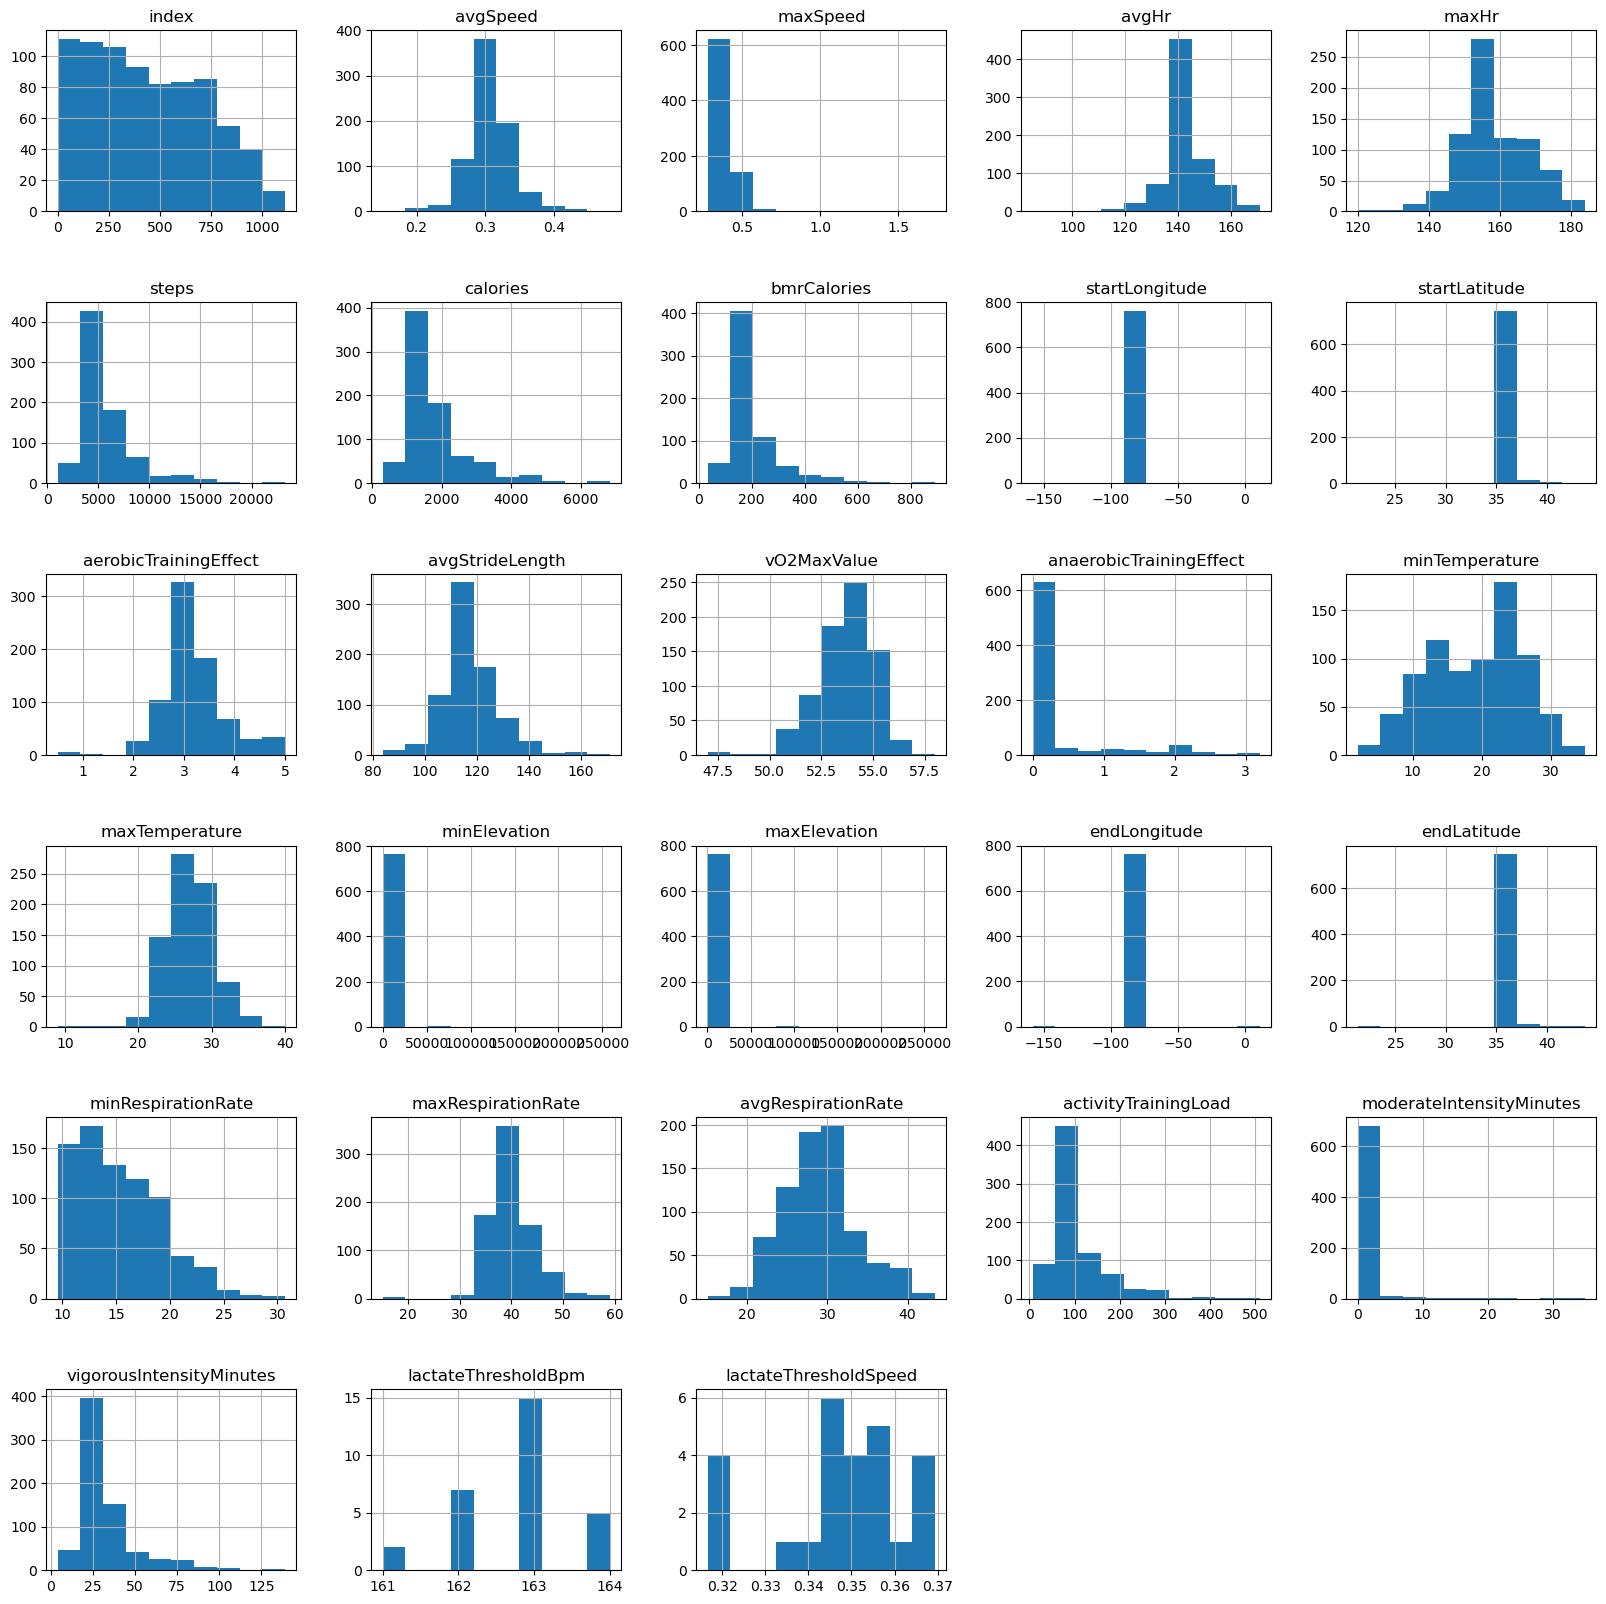

In [25]:
summarizedActivities_running.hist(figsize=(20,20))
plt.subplots_adjust(hspace=0.5);

Possible areas of concern:
- `max speed` - this looks clustered near the low end.  Need to check for outliers on the right.  Also, maybe a job for later, but **speed** for a running activity may be better represented by minutes per mile, or **pace**.  I'm not even sure what unit of measure this is.  We can look at that conversion later.
- `avgHR` and `maxHR` seem slightly heavy on the high end.  Not sure if this is an issue, but possibly worth taking a look whether there are some low end outliers, or a small group of lower intensity activities not worth including.
- `steps` looks right skewed, as does `calories` and `bmrCalories`, but this may be normal.
- the values for `startLongitude` and `startLatitude` appear quite similar, but this is ok as it simply represents a location and some runs were done away from home.  Same for `endLongitude` and 'endLatitude`.
- Our target feature, `aerobicTraningEffect` looks fairly normal, although there is a bit of a gap on the low end.  Probably nothing, but we can take a closer look at the numbers.  Same with `vO2MaxValue` and `maxRespiraionRate`.
- Although `anaerobicTrainingEffect` is strongly right skewed, this is normal since most activities are not anaerobic.
- `minElevation` and `maxElevation` - similar to the location based features.  Some runs were done in Colorado, so the min and max elevations are understandably quite different.
- `minRespirationRate` looks reasonable, even though it's a little right skewed, but this may be normal.
`activityTrainingLoad` and `vigorousIntensityMinutes` are definately clustered on the left, but again, this is probably normal considering most activities were lower intensity.
- `moderateIntensityMinutes` is almost all on the left, possibly because running activitites are not typically classified as **moderate**.  This may relate more to a fast walk or hike, but considering we filtered for just **running** activities, we can take a closer look.

Let's start with `maxSpeed'.

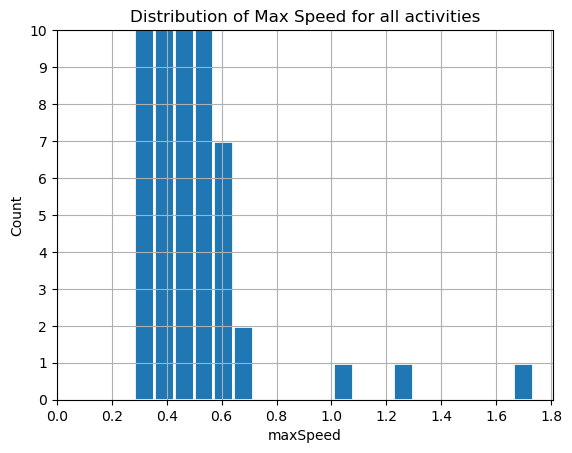

In [26]:
summarizedActivities_running.maxSpeed.hist(bins=20,edgecolor='white', linewidth=2)
plt.xlabel('maxSpeed')
plt.ylabel('Count')
plt.title('Distribution of Max Speed for all activities')
plt.ylim(0, 10)
plt.xticks(np.arange(0, 2, .2))
plt.yticks(np.arange(0, 11, 1));

Looks like there are a few outliers.  Let's take a closer look at the data.

In [27]:
keyFeatures = ['name','maxSpeed','maxHr','maxRespirationRate','activityTrainingLoad','anaerobicTrainingEffect','anaerobicTrainingEffectMessage']
summarizedActivities_running[keyFeatures][summarizedActivities_running.maxSpeed > .8].iloc[:,:10]

,name,maxSpeed,maxHr,maxRespirationRate,activityTrainingLoad,anaerobicTrainingEffect,anaerobicTrainingEffectMessage
565,Chapel Hill Trail Running,1.2618,154.0,36.099998,78.033096,0.0,NO_ANAEROBIC_BENEFIT_0
728,Sprint Intervals at McDougal,1.0301,172.0,41.740002,153.679794,3.0,IMPROVING_ANAEROBIC_CAPACITY_AND_SPEED_12
759,Chapel Hill Running,1.7346,127.0,17.510000,8.578049,0.0,NO_ANAEROBIC_BENEFIT_0


Luckily, I remember activity 728, labeled "Sprint Intervals at McDougal."  It was painful, but a good marker for the upper limit of `maxSpeed`!  Being an all out sprint, I can't imagine any other activity logging a maximum speed above that.  In addition, considering the other two activities show **NO_ANAEROBIC_BENEFIT_0** under `anaerobicTrainingEffectMessage', which is highly unlikely if I'm going that fast, and a lower max heart rate (expecially for activity 991), I will consider the other two activities errors and drop them.

In [28]:
i = summarizedActivities_running[summarizedActivities_running.maxSpeed > 1.1].index
print(i)
summarizedActivities_running.drop(i, inplace=True)
summarizedActivities_running.info()

Int64Index([565, 759], dtype='int64')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 776
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           775 non-null    int64  
 1   name                            775 non-null    object 
 2   activityType                    775 non-null    object 
 3   sportType                       775 non-null    object 
 4   avgSpeed                        775 non-null    float64
 5   maxSpeed                        775 non-null    float64
 6   avgHr                           775 non-null    float64
 7   maxHr                           775 non-null    float64
 8   steps                           775 non-null    float64
 9   calories                        775 non-null    float64
 10  bmrCalories                     646 non-null    float64
 11  startLongitude                  766 non-null    float64
 12

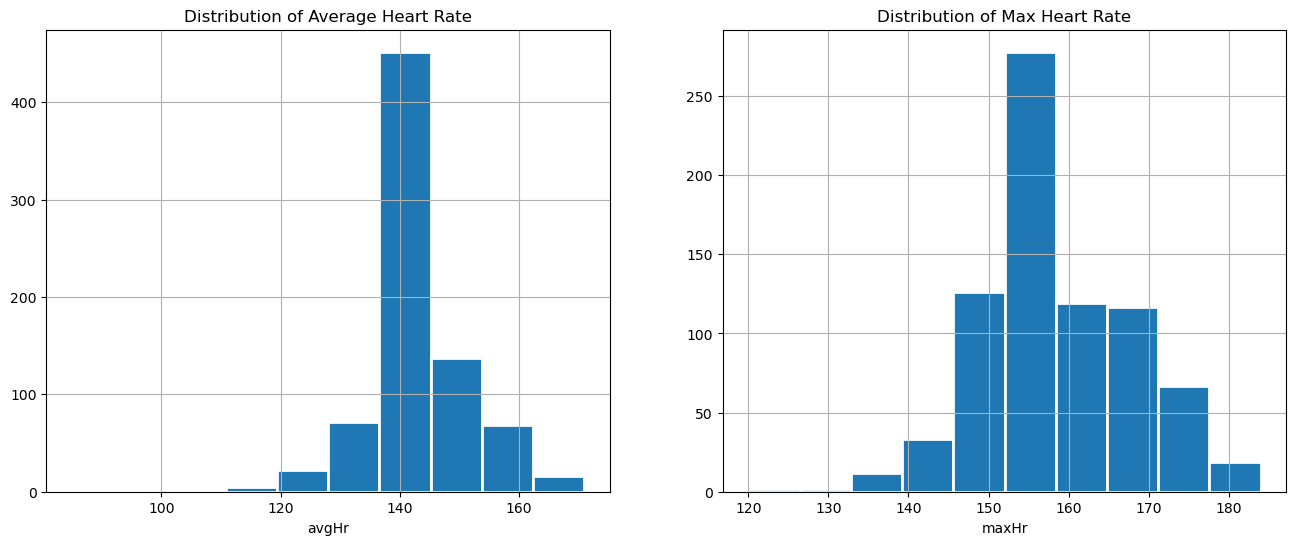

In [29]:
#Create two subplots on 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

summarizedActivities_running.avgHr.hist(ax=ax[0], edgecolor='white', linewidth=2)
ax[0].set_title('Distribution of Average Heart Rate')
ax[0].set_xlabel('avgHr')

summarizedActivities_running.maxHr.hist(ax=ax[1], edgecolor='white', linewidth=2)
ax[1].set_title('Distribution of Max Heart Rate')
ax[1].set_xlabel('maxHr');

Let's take a look at the details of the activities on the very low end, starting with `avgHr`.

In [30]:
print(summarizedActivities_running.avgHr[summarizedActivities_running['avgHr'] < 120].count())
print(summarizedActivities_running.avgHr[summarizedActivities_running['avgHr'] < 120])


7
208    116.0
329    114.0
358    118.0
460    115.0
761    112.0
762    105.0
767     85.0
Name: avgHr, dtype: float64


In [31]:
summarizedActivities_running[summarizedActivities_running['avgHr'] < 120]

,index,name,activityType,sportType,avgSpeed,maxSpeed,avgHr,maxHr,steps,calories,...,avgRespirationRate,trainingEffectLabel,activityTrainingLoad,aerobicTrainingEffectMessage,anaerobicTrainingEffectMessage,moderateIntensityMinutes,vigorousIntensityMinutes,pr,lactateThresholdBpm,lactateThresholdSpeed
208,211,Chapel Hill Running,running,RUNNING,0.2150,0.2976,116.0,136.0,1822.0,435.76208,...,NaN,UNKNOWN,12.211441,NO_AEROBIC_BENEFIT_18,NO_ANAEROBIC_BENEFIT_0,5.0,6.0,False,NaN,NaN
329,337,Chapel Hill Trail Running,trail_running,RUNNING,0.2201,0.3180,114.0,126.0,7510.0,1801.70860,...,30.870001,AEROBIC_BASE,31.931015,MAINTAINING_AEROBIC_BASE_7,NO_ANAEROBIC_BENEFIT_0,20.0,29.0,False,NaN,NaN
358,373,New York Running,running,RUNNING,0.2904,0.3462,118.0,132.0,6466.0,1780.75850,...,32.029999,AEROBIC_BASE,50.288300,MAINTAINING_AEROBIC_BASE_7,NO_ANAEROBIC_BENEFIT_0,3.0,39.0,False,NaN,NaN
460,506,Chapel Hill Trail Running,trail_running,RUNNING,0.2062,0.3027,115.0,147.0,2720.0,758.39362,...,28.330000,RECOVERY,27.677856,MINOR_AEROBIC_BENEFIT_0,NO_ANAEROBIC_BENEFIT_0,6.0,12.0,False,NaN,NaN
761,995,Chapel Hill Running,running,RUNNING,0.1899,0.3216,112.0,139.0,1242.0,326.82156,...,15.090000,UNKNOWN,10.517288,NO_AEROBIC_BENEFIT_18,NO_ANAEROBIC_BENEFIT_0,NaN,NaN,False,NaN,NaN
762,996,Chapel Hill Running,running,RUNNING,0.1880,0.3118,105.0,136.0,1334.0,305.87146,...,18.059999,UNKNOWN,9.816116,NO_AEROBIC_BENEFIT_18,NO_ANAEROBIC_BENEFIT_0,NaN,NaN,False,NaN,NaN
767,1046,Run With Matthew,running,RUNNING,0.1506,0.3705,85.0,120.0,2754.0,628.50300,...,21.129999,UNKNOWN,7.233780,NO_AEROBIC_BENEFIT_18,NO_ANAEROBIC_BENEFIT_0,NaN,NaN,False,NaN,NaN


In [32]:
summarizedActivities_running.iloc[767]

index                                                                 1070
name                                       Ironwoods Hill Sprint Intervals
activityType                                                       running
sportType                                                          RUNNING
avgSpeed                                                            0.3233
maxSpeed                                                            0.4876
avgHr                                                                145.0
maxHr                                                                171.0
steps                                                               5362.0
calories                                                        1743.04832
bmrCalories                                                            NaN
startLongitude                                                  -79.068964
startLatitude                                                    35.929169
aerobicTrainingEffect    

In [33]:
summarizedActivities_running.columns
keyFeatures = ['name','steps','aerobicTrainingEffect','anaerobicTrainingEffect','avgHr','maxHr']
summarizedActivities_running[keyFeatures][summarizedActivities_running['avgHr'] < 120]

,name,steps,aerobicTrainingEffect,anaerobicTrainingEffect,avgHr,maxHr
208,Chapel Hill Running,1822.0,0.9,0.0,116.0,136.0
329,Chapel Hill Trail Running,7510.0,2.1,0.0,114.0,126.0
358,New York Running,6466.0,2.6,0.0,118.0,132.0
460,Chapel Hill Trail Running,2720.0,2.0,0.0,115.0,147.0
761,Chapel Hill Running,1242.0,0.6,0.0,112.0,139.0
762,Chapel Hill Running,1334.0,0.5,0.0,105.0,136.0
767,Run With Matthew,2754.0,0.5,0.0,85.0,120.0


These are on the low end as for as average heart rate, but they do not look like errors. Lets take a look at `maxHr`.

In [38]:
print(summarizedActivities_running.avgHr[summarizedActivities_running['maxHr'] < 135].count())
print(summarizedActivities_running.avgHr[summarizedActivities_running['maxHr'] < 135])

6
7      121.0
145    121.0
329    114.0
358    118.0
741    120.0
767     85.0
Name: avgHr, dtype: float64


In [39]:
summarizedActivities_running[keyFeatures][summarizedActivities_running['maxHr'] < 135]

,name,steps,aerobicTrainingEffect,anaerobicTrainingEffect,avgHr,maxHr
7,Prince William County Running,5888.0,2.6,0.0,121.0,131.0
145,Durham County Running,22882.0,3.9,0.0,121.0,133.0
329,Chapel Hill Trail Running,7510.0,2.1,0.0,114.0,126.0
358,New York Running,6466.0,2.6,0.0,118.0,132.0
741,Carolina North Trail Run,8644.0,2.2,0.0,120.0,133.0
767,Run With Matthew,2754.0,0.5,0.0,85.0,120.0


Again, they are low, similar to the low `avgHr` activities, but not errors.

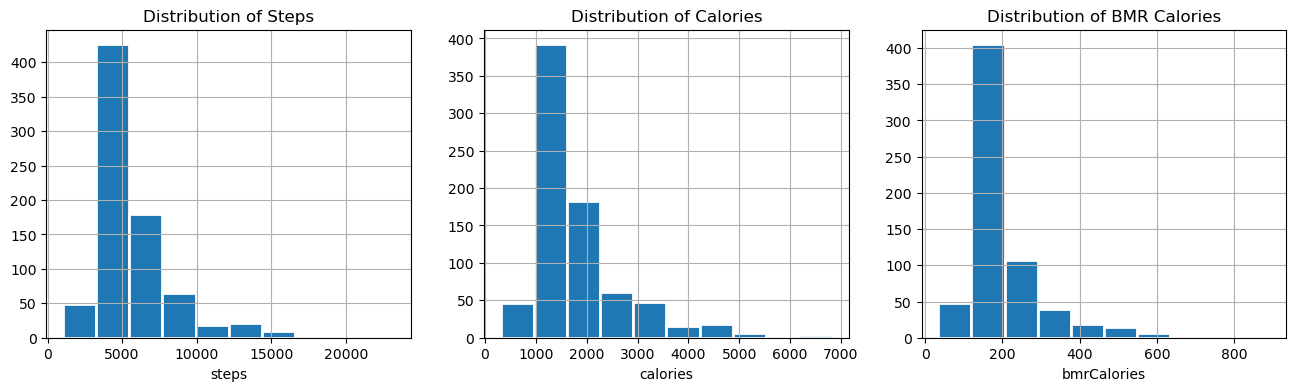

In [88]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

summarizedActivities_running.steps.hist(ax=ax[0], edgecolor='white', linewidth=2)
ax[0].set_title('Distribution of Steps')
ax[0].set_xlabel('steps')

summarizedActivities_running.calories.hist(ax=ax[1], edgecolor='white', linewidth=2, )
ax[1].set_title('Distribution of Calories')
ax[1].set_xlabel('calories')

summarizedActivities_running.bmrCalories.hist(ax=ax[2], edgecolor='white', linewidth=2)
ax[2].set_title('Distribution of BMR Calories')
ax[2].set_xlabel('bmrCalories');


In [99]:
keyFeatures = ['name','steps','calories','bmrCalories','aerobicTrainingEffect','avgHr','anaerobicTrainingEffect','maxHr']
summarizedActivities_running[keyFeatures][summarizedActivities_running['steps'] > 15000].sort_values('steps', ascending=False)

,name,steps,calories,bmrCalories,aerobicTrainingEffect,avgHr,anaerobicTrainingEffect,maxHr
172,Durham - 17mi,23264.0,6825.54258,888.28424,4.1,128.0,0.0,164.0
145,Durham County Running,22882.0,6402.35056,892.47426,3.9,121.0,0.0,133.0
180,Durham Running,20918.0,6435.87072,779.34372,3.9,127.0,0.0,141.0
221,Chapel Hill Trail Running,17826.0,5685.85714,645.26308,4.7,147.0,2.2,172.0
78,Chapel Hill Trail Running,17334.0,4194.21002,645.26308,3.0,123.0,0.0,135.0
702,Orange County Trail Running,16752.0,4956.79366,NaN,3.5,130.0,0.2,151.0
463,Wake County Trail Running,16420.0,6222.17970,565.65270,5.0,166.0,2.2,177.0
348,Carrboro Trail Running,16148.0,4319.91062,607.55290,3.3,131.0,0.4,161.0
187,Chapel Hill Trail Running,16140.0,4571.31182,590.79282,3.4,134.0,0.0,148.0
665,Chapel Hill Running,16138.0,5141.15454,NaN,3.8,130.0,0.0,151.0


In [96]:
summarizedActivities_running[keyFeatures][summarizedActivities_running['calories'] > 5000].sort_values('calories', ascending=False)

,name,steps,calories,bmrCalories,aerobicTrainingEffect,avgHr
172,Durham - 17mi,23264.0,6825.54258,888.28424,4.1,128.0
180,Durham Running,20918.0,6435.87072,779.34372,3.9,127.0
145,Durham County Running,22882.0,6402.35056,892.47426,3.9,121.0
463,Wake County Trail Running,16420.0,6222.17970,565.65270,5.0,166.0
221,Chapel Hill Trail Running,17826.0,5685.85714,645.26308,4.7,147.0
197,Laurel Park Running,14862.0,5476.35614,511.18244,5.0,161.0
665,Chapel Hill Running,16138.0,5141.15454,NaN,3.8,130.0
523,Chapel Hill Trail Running,14416.0,5132.77450,494.42236,5.0,160.0
246,Asheville Running,14438.0,5120.20444,481.85230,5.0,162.0


In [100]:
summarizedActivities_running[keyFeatures][summarizedActivities_running['bmrCalories'] > 600].sort_values('bmrCalories', ascending=False)

,name,steps,calories,bmrCalories,aerobicTrainingEffect,avgHr,anaerobicTrainingEffect,maxHr
145,Durham County Running,22882.0,6402.35056,892.47426,3.9,121.0,0.0,133.0
172,Durham - 17mi,23264.0,6825.54258,888.28424,4.1,128.0,0.0,164.0
180,Durham Running,20918.0,6435.87072,779.34372,3.9,127.0,0.0,141.0
78,Chapel Hill Trail Running,17334.0,4194.21002,645.26308,3.0,123.0,0.0,135.0
221,Chapel Hill Trail Running,17826.0,5685.85714,645.26308,4.7,147.0,2.2,172.0
348,Carrboro Trail Running,16148.0,4319.91062,607.55290,3.3,131.0,0.4,161.0


None of these look particularly problematic.  

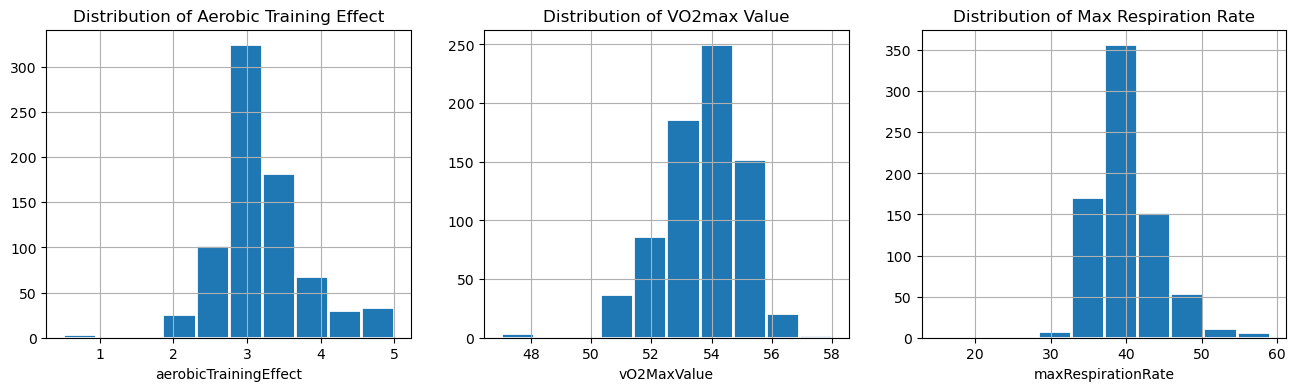

In [103]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

summarizedActivities_running.aerobicTrainingEffect.hist(ax=ax[0], edgecolor='white', linewidth=2)
ax[0].set_title('Distribution of Aerobic Training Effect')
ax[0].set_xlabel('aerobicTrainingEffect')

summarizedActivities_running.vO2MaxValue.hist(ax=ax[1], edgecolor='white', linewidth=2, )
ax[1].set_title('Distribution of VO2max Value')
ax[1].set_xlabel('vO2MaxValue')

summarizedActivities_running.maxRespirationRate.hist(ax=ax[2], edgecolor='white', linewidth=2)
ax[2].set_title('Distribution of Max Respiration Rate')
ax[2].set_xlabel('maxRespirationRate');

In [113]:
keyFeatures = ['vO2MaxValue','maxRespirationRate','name','steps','aerobicTrainingEffect','anaerobicTrainingEffect','avgHr','maxHr']
summarizedActivities_running[keyFeatures][summarizedActivities_running['aerobicTrainingEffect'] < 2].sort_values('aerobicTrainingEffect', ascending=False)

,vO2MaxValue,maxRespirationRate,name,steps,aerobicTrainingEffect,anaerobicTrainingEffect,avgHr,maxHr
257,NaN,NaN,Chapel Hill Running,1568.0,1.2,0.0,127.0,141.0
208,NaN,NaN,Chapel Hill Running,1822.0,0.9,0.0,116.0,136.0
761,NaN,15.090000,Chapel Hill Running,1242.0,0.6,0.0,112.0,139.0
762,NaN,18.059999,Chapel Hill Running,1334.0,0.5,0.0,105.0,136.0
767,NaN,31.020000,Run With Matthew,2754.0,0.5,0.0,85.0,120.0


In [114]:
summarizedActivities_running[keyFeatures][summarizedActivities_running['vO2MaxValue'] < 50].sort_values('vO2MaxValue', ascending=False)

,vO2MaxValue,maxRespirationRate,name,steps,aerobicTrainingEffect,anaerobicTrainingEffect,avgHr,maxHr
771,49.0,44.619999,Chapel Hill Running,12586.0,4.4,1.2,152.0,171.0
772,48.0,46.200001,Chapel Hill Running,6392.0,4.0,1.3,157.0,180.0
773,48.0,52.310001,Chapel Hill Running,6558.0,4.1,2.1,156.0,181.0
774,47.0,49.470001,Chapel Hill Running,6264.0,5.0,2.3,158.0,177.0
775,47.0,45.560001,Chapel Hill Running,6292.0,5.0,1.4,161.0,176.0


In [119]:
summarizedActivities_running[keyFeatures][summarizedActivities_running['maxRespirationRate'] < 32].sort_values('maxRespirationRate', ascending=False)

,vO2MaxValue,maxRespirationRate,name,steps,aerobicTrainingEffect,anaerobicTrainingEffect,avgHr,maxHr
293,54.0,31.430000,Chapel Hill Trail Running,4386.0,2.6,0.0,135.0,145.0
71,54.0,31.240000,Chapel Hill Trail Running,3986.0,2.7,0.0,139.0,150.0
165,54.0,31.129999,Chapel Hill Trail Running,5974.0,3.0,0.0,140.0,151.0
767,NaN,31.020000,Run With Matthew,2754.0,0.5,0.0,85.0,120.0
167,54.0,30.150000,Chapel Hill Trail Running,5930.0,3.1,0.0,144.0,156.0
762,NaN,18.059999,Chapel Hill Running,1334.0,0.5,0.0,105.0,136.0
761,NaN,15.090000,Chapel Hill Running,1242.0,0.6,0.0,112.0,139.0


These three features look ok, except for activitiy 767.  I don't like how high the `maxRespirationRate` is compared to the `aerobicTrainingEffect`. This activity just doesn't correlate well with the rest of the data. Dropping activity 767.

In [122]:
# summarizedActivities_running.drop(767, inplace=True)
summarizedActivities_running.reset_index()

,level_0,index,name,activityType,sportType,avgSpeed,maxSpeed,avgHr,maxHr,steps,...,avgRespirationRate,trainingEffectLabel,activityTrainingLoad,aerobicTrainingEffectMessage,anaerobicTrainingEffectMessage,moderateIntensityMinutes,vigorousIntensityMinutes,pr,lactateThresholdBpm,lactateThresholdSpeed
0,0,0,Chapel Hill Trail Running,trail_running,RUNNING,0.3027,0.3705,140.0,153.0,4058.0,...,26.160000,AEROBIC_BASE,67.585266,MAINTAINING_AEROBIC_FITNESS_1,NO_ANAEROBIC_BENEFIT_0,0.0,23.0,False,NaN,NaN
1,1,1,Chapel Hill Trail Running,trail_running,RUNNING,0.3397,0.4704,147.0,177.0,5856.0,...,29.389999,TEMPO,152.824707,IMPROVING_AEROBIC_FITNESS_2,MAINTAINING_ANAEROBIC_BASE_1,1.0,35.0,False,NaN,NaN
2,2,2,Chapel Hill Trail Running,trail_running,RUNNING,0.3186,0.4182,140.0,153.0,3996.0,...,29.440001,AEROBIC_BASE,76.669128,IMPROVING_AEROBIC_BASE_8,NO_ANAEROBIC_BENEFIT_0,0.0,23.0,False,NaN,NaN
3,3,3,Chapel Hill Trail Running,trail_running,RUNNING,0.2824,0.3869,142.0,152.0,10334.0,...,25.559999,AEROBIC_BASE,119.272537,IMPROVING_AEROBIC_ENDURANCE_9,NO_ANAEROBIC_BENEFIT_0,0.0,65.0,False,NaN,NaN
4,4,4,Chapel Hill Trail Running,trail_running,RUNNING,0.2818,0.4320,146.0,173.0,7294.0,...,29.230000,TEMPO,146.828323,IMPROVING_AEROBIC_FITNESS_2,MAINTAINING_ANAEROBIC_POWER_7,0.0,46.0,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,772,1100,Chapel Hill Running,running,RUNNING,0.2998,0.4469,157.0,180.0,6392.0,...,37.060001,LACTATE_THRESHOLD,203.743698,HIGHLY_IMPROVING_LACTATE_THRESHOLD_13,MINOR_ANAEROBIC_BENEFIT_15,NaN,NaN,False,161.0,0.3166
770,773,1101,Chapel Hill Running,running,RUNNING,0.2954,0.4731,156.0,181.0,6558.0,...,38.410000,LACTATE_THRESHOLD,228.597305,HIGHLY_IMPROVING_LACTATE_THRESHOLD_13,MAINTAINING_ANAEROBIC_BASE_1,NaN,NaN,False,162.0,0.3194
771,774,1105,Chapel Hill Running,running,RUNNING,0.3104,0.3760,158.0,177.0,6264.0,...,38.580002,VO2MAX,256.145081,OVERREACHING_17,MAINTAINING_ANAEROBIC_BASE_1,NaN,NaN,False,162.0,0.3194
772,775,1109,Chapel Hill Running,running,RUNNING,0.3079,0.4423,161.0,176.0,6292.0,...,38.459999,VO2MAX,261.432251,OVERREACHING_17,MINOR_ANAEROBIC_BENEFIT_15,NaN,NaN,False,NaN,NaN


In [133]:
keyFeatures = ['activityTrainingLoad','maxRespirationRate','name','steps','aerobicTrainingEffect','anaerobicTrainingEffect','avgHr','maxHr']
summarizedActivities_running[keyFeatures][summarizedActivities_running['activityTrainingLoad'] < 40].sort_values('activityTrainingLoad', ascending=False)

,activityTrainingLoad,maxRespirationRate,name,steps,aerobicTrainingEffect,anaerobicTrainingEffect,avgHr,maxHr
332,39.434631,38.090000,Chapel Hill Trail Running,2076.0,2.3,0.0,142.0,151.0
287,38.862259,37.980000,Chapel Hill Trail Running,2060.0,2.3,0.0,136.0,148.0
311,38.571259,36.799999,Chapel Hill Trail Running,2296.0,2.3,0.0,138.0,145.0
540,37.566559,36.220001,Chapel Hill Trail Running,2098.0,2.2,0.0,120.0,153.0
385,37.376892,32.790001,Chapel Hill Trail Running,2220.0,2.2,0.0,132.0,142.0
433,36.981857,38.099998,Chapel Hill Trail Running,2202.0,2.3,0.0,137.0,147.0
741,35.954056,39.669998,Carolina North Trail Run,8644.0,2.2,0.0,120.0,133.0
557,34.556473,37.360001,Chapel Hill Trail Running,1956.0,2.1,0.0,139.0,148.0
511,33.688370,37.080002,Chapel Hill Trail Running,2056.0,2.1,0.0,120.0,161.0
732,33.072281,36.910000,Chapel Hill Running,1546.0,2.0,0.0,138.0,147.0


In [ ]:
# look at vigorousIntensityMinutes > 100, and
# moderateIntensityMinutes > 30

In [138]:
keyFeatures = ['name','vigorousIntensityMinutes','activityTrainingLoad','steps','aerobicTrainingEffect','anaerobicTrainingEffect','avgHr','maxHr']
summarizedActivities_running[keyFeatures][summarizedActivities_running['vigorousIntensityMinutes'] > 100].sort_values('vigorousIntensityMinutes',ascending=False)

,name,vigorousIntensityMinutes,activityTrainingLoad,steps,aerobicTrainingEffect,anaerobicTrainingEffect,avgHr,maxHr
172,Durham - 17mi,139.0,173.747772,23264.0,4.1,0.0,128.0,164.0
180,Durham Running,137.0,169.510971,20918.0,3.9,0.0,127.0,141.0
145,Durham County Running,130.0,152.539703,22882.0,3.9,0.0,121.0,133.0
221,Chapel Hill Trail Running,111.0,269.476593,17826.0,4.7,2.2,147.0,172.0
702,Orange County Trail Running,105.0,129.220230,16752.0,3.5,0.2,130.0,151.0
187,Chapel Hill Trail Running,103.0,116.587418,16140.0,3.4,0.0,134.0,148.0
348,Carrboro Trail Running,103.0,99.343384,16148.0,3.3,0.4,131.0,161.0
665,Chapel Hill Running,103.0,148.165909,16138.0,3.8,0.0,130.0,151.0


## Import Second JSON File - "88467128_userBioMetrics.json"

In [83]:
with open("../data/88467128_userBioMetrics.json") as userBioMetrics_file:
    userBio_df = pd.read_json(userBioMetrics_file)

In [84]:
userBio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   version                              800 non-null    int64  
 1   metaData                             800 non-null    object 
 2   userSetNullForHeight                 800 non-null    bool   
 3   userSetNullForWeight                 800 non-null    bool   
 4   userSetNullForActivityClass          800 non-null    bool   
 5   userSetNullForLactateThresholdSpeed  800 non-null    bool   
 6   userSetNullForLactateThresholdHR     800 non-null    bool   
 7   userSetNullForVO2MaxCycling          800 non-null    bool   
 8   userSetNullForVO2MaxRunning          800 non-null    bool   
 9   height                               27 non-null     float64
 10  weight                               11 non-null     object 
 11  vo2MaxRunning                   

In [85]:
userBio_df.head(10)

,version,metaData,userSetNullForHeight,userSetNullForWeight,userSetNullForActivityClass,userSetNullForLactateThresholdSpeed,userSetNullForLactateThresholdHR,userSetNullForVO2MaxCycling,userSetNullForVO2MaxRunning,height,weight,vo2MaxRunning,lactateThresholdSpeed,lactateThresholdHearRate,firstbeatRunningLtTimestamp,thresholdHeartRateAutoDetected,activityClass,sportId,functionalThresholdPower
0,1598395611521,"{'userProfilePK': 88467128, 'calendarDate': '2...",True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1598395686926,"{'userProfilePK': 88467128, 'calendarDate': '2...",False,False,False,False,False,False,False,182.880005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1598395686946,"{'userProfilePK': 88467128, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,"{'weight': 72574.0, 'sourceType': 'USER_SETTIN...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1598458352012,"{'userProfilePK': 88467128, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1598612573269,"{'userProfilePK': 88467128, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1598871645728,"{'userProfilePK': 88467128, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1598871637324,"{'userProfilePK': 88467128, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,NaN,NaN,0.319400,162.0,NaN,NaN,NaN,NaN,NaN
7,1598871647336,"{'userProfilePK': 88467128, 'calendarDate': '2...",False,False,True,False,False,True,False,182.880005,NaN,48.0,0.319444,162.0,967805859.0,1.0,NaN,NaN,NaN
8,1599059312695,"{'userProfilePK': 88467128, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1599043179591,"{'userProfilePK': 88467128, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN


There are only a few features among the 19 which are of any interest.  Let's create a new dataframe with just those features and take a closer look at `metaData`.

In [86]:
userBio_featureList = ['vo2MaxRunning','lactateThresholdHearRate','lactateThresholdSpeed']
userBio = userBio_df[userBio_featureList]
userBio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vo2MaxRunning             753 non-null    float64
 1   lactateThresholdHearRate  42 non-null     float64
 2   lactateThresholdSpeed     52 non-null     float64
dtypes: float64(3)
memory usage: 18.9 KB


In [87]:
print(type(userBio_df.metaData.iloc[0]))
print(userBio_df.metaData.iloc[0])
print(type(userBio_df.metaData.iloc[0].get('calendarDate')))

<class 'dict'>
{'userProfilePK': 88467128, 'calendarDate': '2020-08-25T18:46:51.490', 'sequence': 1598395611521}
<class 'str'>


So there is a calendar date which may be important.  Let's make a list if those dates.

In [88]:
date_format = '%Y-%m-%dT%H:%M:%S.%f'
userBio_dateList = [datetime.strptime(userBio_df.loc[activity].metaData.get('calendarDate'), date_format).date() for activity in range(len(userBio_df))]
userBio_dateList[:5]

[datetime.date(2020, 8, 25),
 datetime.date(2020, 8, 25),
 datetime.date(2020, 8, 25),
 datetime.date(2020, 8, 26),
 datetime.date(2020, 8, 28)]

Now let's add that as a column in our new dataframe.

In [89]:
userBio['date'] = userBio_dateList
userBio.head(10)

C:\Users\marcm\AppData\Local\Temp\ipykernel_23436\434451606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userBio['date'] = userBio_dateList


,vo2MaxRunning,lactateThresholdHearRate,lactateThresholdSpeed,date
0,NaN,NaN,NaN,2020-08-25
1,NaN,NaN,NaN,2020-08-25
2,NaN,NaN,NaN,2020-08-25
3,48.0,NaN,NaN,2020-08-26
4,48.0,NaN,NaN,2020-08-28
5,48.0,NaN,NaN,2020-08-31
6,NaN,162.0,0.319400,2020-08-31
7,48.0,162.0,0.319444,2020-08-31
8,48.0,NaN,NaN,2020-09-02
9,NaN,NaN,NaN,2020-09-02


In [90]:
userBio_missing = pd.DataFrame({'count': userBio.isnull().sum(), '%': 100 * userBio.isnull().mean()})
userBio_missing.sort_values('count', ascending=False)

,count,%
lactateThresholdHearRate,758,94.750
lactateThresholdSpeed,748,93.500
vo2MaxRunning,47,5.875
date,0,0.000


As in the last set of data, `lactateThresholdHearRate` and `lactateThresholdSpeed` are only measureed when there is a **change**, so the fact that these columns are mostly blank is not really concerning.  And now, since we have an associated date which the dataframe seems to be sorted by, we can forward fill the values.  However, let's hold off on that since we may be able to learn something from the pattern of when the null values show up in these two columns in realation to the `date` and `vo2MaxRunning`. 

In [91]:
# userBio_ffillColumns = ['lactateThresholdHearRate','lactateThresholdSpeed']
# userBio.loc[:,userBio_ffillColumns] = userBio.loc[:,userBio_ffillColumns].ffill()

In [92]:
# userBio_missing = pd.DataFrame({'count': userBio.isnull().sum(), '%': 100 * userBio.isnull().mean()})
# userBio_missing.sort_values('count', ascending=False)

In [180]:
userBio.iloc[:50,:]

,vo2MaxRunning,lactateThresholdHearRate,lactateThresholdSpeed,date
0,NaN,NaN,NaN,2020-08-25
1,NaN,NaN,NaN,2020-08-25
2,NaN,NaN,NaN,2020-08-25
3,48.0,NaN,NaN,2020-08-26
4,48.0,NaN,NaN,2020-08-28
5,48.0,NaN,NaN,2020-08-31
6,NaN,162.0,0.319400,2020-08-31
7,48.0,162.0,0.319444,2020-08-31
8,48.0,NaN,NaN,2020-09-02
9,NaN,NaN,NaN,2020-09-02


There seems to be in interesting pattern.  Null values in the `vo2MaxRunning` column seem to coincide with with non-null values in the other two columns and there are three entries on one day.